# Lineer Regresyon İle Tahmin 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df= pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.isnull().sum()*100/df.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [5]:
df_corr=df.corr()
df_corr['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

- <b><i>OverallQual      0.790982 :</i>       <b>  Overall material and finish quality</b> 
    <br> <br/>
- <b><i>YearBuilt      0.522897 : </i>       <b>  Original construction date</b> 
    <br> <br/>  

- YearRemodAdd     0.507101 : Remodel date 
     <br> <br/>  
- 1stFlrSF         0.605852 : First Floor square feet
     <br> <br/>  
- 2ndFlrSF         0.319334 : Second floor square feet
     <br> <br/>  

- TotalBsmtSF      0.613581 : Total square feet of basement area
     <br> <br/>  
- GrLivArea        0.708624 : Above grade (ground) living area square feet
     <br> <br/>  
- FullBath         0.560664 : Full bathrooms above grade
     <br> <br/>  
- HalfBath         0.284108 : Half baths above grade
     <br> <br/>  

- GarageCars       0.640409 : Size of garage in car capacity
     <br> <br/>  
- GarageArea       0.623431 : Size of garage in square feet

In [35]:
Y = df['SalePrice']
X= df[['OverallQual','YearBuilt',"YearRemodAdd","1stFlrSF","2ndFlrSF","TotalBsmtSF","GrLivArea","FullBath","HalfBath","GarageCars","GarageArea"]]+1

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [37]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     355.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:55:49   Log-Likelihood:                -13950.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1156   BIC:                         2.799e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.108e+06   1.47e+05     -7.532      0.000    -1.4e+06    -8.2e+05
OverallQual   1.975e+04   1340.934     14.731      0.000    1.71e+04    2.24e+04
YearBuilt      267.4288     59.968      4.459      0.000     149.770     385.088
YearRemodAdd   245.3100     70.871      3.461      0.001     106.259     384.361
1stFlrSF        45.5537     22.195      2.052      0.040       2.007      89.100
2ndFlrSF        32.3228     22.022      1.468      0.142     -10.884      75.529
TotalBsmtSF     13.3368      4.637      2.876      0.004       4.238      22.435
GrLivArea       18.6670     21.481      0.869      0.385     -23.480      60.814
FullBath     -4800.7089   3205.939     -1.497      0.135   -1.11e+04    1489.403
HalfBath      -849.8392   3154.259     -0.269      0.788   -7038.553    5338.875
GarageCars    1.192e+04   3466.537      3.438      0.001    5116.710    1.87e+04
GarageArea      16.1653     11.608      1.393      0.164      -6.609      38.940
==============================================================================
Omnibus:                      426.458   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43746.989
Skew:                          -0.677   Prob(JB):                         0.00
Kurtosis:                      32.951   Cond. No.                     4.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

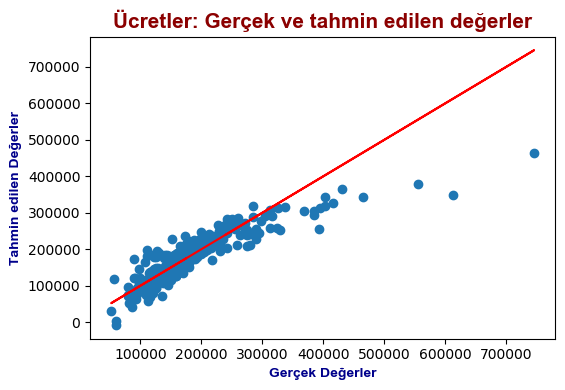

Ortalama Mutlak Hata (MAE)        : 25906.53056347342
Ortalama Kare Hata (MSE)          : 1627001575.8307717
Kök Ortalama Kare Hata (RMSE)     : 40336.10759395076
Ortalama Mutlak Yüzde Hata (MAPE) : 15.029213369415508


In [38]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [49]:
Y = df['SalePrice']
df['explain_variable']= df['OverallQual'] * df['GrLivArea']
X= df[['OverallQual','YearBuilt',"YearRemodAdd","1stFlrSF","2ndFlrSF","TotalBsmtSF","GrLivArea","FullBath","HalfBath","GarageCars","GarageArea","explain_variable"]]+1

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [51]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     340.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:13:33   Log-Likelihood:                -13929.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1155   BIC:                         2.795e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.003e+06   1.46e+05     -6.890      0.000   -1.29e+06   -7.17e+05
OverallQual       8111.9922   2232.700      3.633      0.000    3731.390    1.25e+04
YearBuilt          232.3311     59.189      3.925      0.000     116.201     348.461
YearRemodAdd       265.6499     69.726      3.810      0.000     128.846     402.454
1stFlrSF            40.2788     21.829      1.845      0.065      -2.551      83.108
2ndFlrSF            23.8777     21.683      1.101      0.271     -18.665      66.420
TotalBsmtSF          9.6593      4.593      2.103      0.036       0.648      18.671
GrLivArea          -29.1172     22.371     -1.302      0.193     -73.010      14.775
FullBath          -699.4387   3214.250     -0.218      0.828   -7005.861    5606.984
HalfBath           938.9948   3112.468      0.302      0.763   -5167.730    7045.720
GarageCars        1.495e+04   3439.294      4.348      0.000    8205.491    2.17e+04
GarageArea           6.3254     11.510      0.550      0.583     -16.257      28.908
explain_variable     7.7112      1.194      6.460      0.000       5.369      10.053
==============================================================================
Omnibus:                      853.972   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119615.678
Skew:                          -2.480   Prob(JB):                         0.00
Kurtosis:                      52.328   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

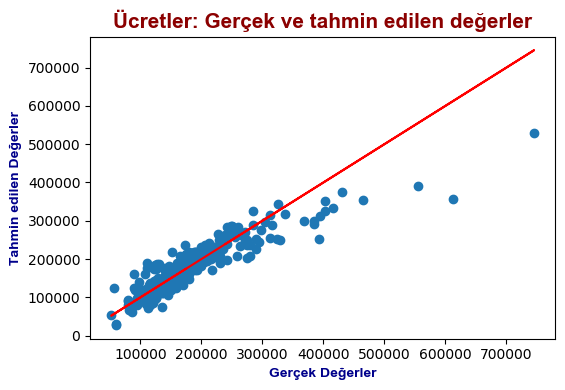

Ortalama Mutlak Hata (MSE)        : 24113.590486078287
Ortalama Kare Hata (MSE)          : 1378018891.7300038
Kök Ortalama Kare Hata (RMSE)     : 37121.67684426451
Ortalama Mutlak Yüzde Hata (MAPE) : 13.502683787278269


In [52]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))